In [1]:
# aivietnam.ai - advertising
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]

    features_X = np.insert(features_X, 0, 1, axis=1)

    return features_X, sales_Y

In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [7]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (1 + loss)
    return fitness_value

In [8]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [9]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    
    return individual1_new, individual2_new

In [10]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [11]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [12]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [23]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [24]:
population = initializePopulation(100)
print(len(population))

100


In [15]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [25]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[1.157609965990255, -2.30682305778915, 0.8281059821746306, 2.038528499563493]


In [18]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    # Sort the population based on fitness (lower is better if minimizing loss)
    sorted_population = sorted(old_population, key=compute_fitness)

    # Print the best loss and the corresponding chromosome for the current generation
    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])

    new_population = []
    # Generate new population through selection, crossover, and mutation
    while len(new_population) < m - elitism:
        # Selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # Crossover to produce offspring
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # Mutation (apply some mutation function)
        individual_c1 = mutate(individual_c1)
        individual_c2 = mutate(individual_c2)

        # Add the mutated offspring to the new population
        new_population.append(individual_c1)
        if len(new_population) < m - elitism:
            new_population.append(individual_c2)

    # Copy the best chromosomes (elitism) to the next generation directly
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

In [19]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [26]:
ls = [1, 2, 3, 4, 5]
for i in ls[5 - 2:]:
    print(i)

4
5


# All-in-one

In [27]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return losses_list


Best loss: 384.1538432166617 with chromosome: [1.1670018318051756, 0.1624794871665125, 0.7545527807326102, -0.8413878671724684]
Best loss: 205.84421891454593 with chromosome: [-0.3740693546704965, 0.16825129583074472, 0.05529324620242804, -0.003577266576462179]
Best loss: 205.84421891454593 with chromosome: [-0.3740693546704965, 0.16825129583074472, 0.05529324620242804, -0.003577266576462179]
Best loss: 205.84421891454593 with chromosome: [-0.3740693546704965, 0.16825129583074472, 0.05529324620242804, -0.003577266576462179]
Best loss: 137.96719004304074 with chromosome: [0.09078456649293631, 0.16825129583074472, -0.20105690736830217, -0.003577266576462179]
Best loss: 132.94794673743493 with chromosome: [-0.3740693546704965, 0.16825129583074472, 0.05529324620242804, -0.20551541396130468]
Best loss: 85.12960697396484 with chromosome: [0.7836804278818177, 0.07876160155743439, 0.2563627212279884, 0.1433568219842818]
Best loss: 85.12960697396484 with chromosome: [0.7836804278818177, 0.07876

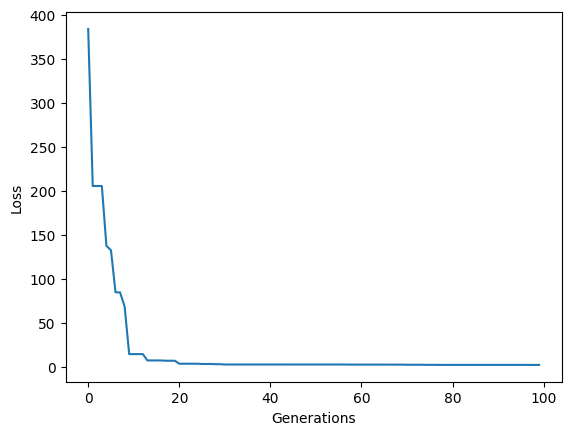

In [28]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
      plt.plot(losses_list)
      plt.xlabel("Generations")
      plt.ylabel("Loss")
      plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]


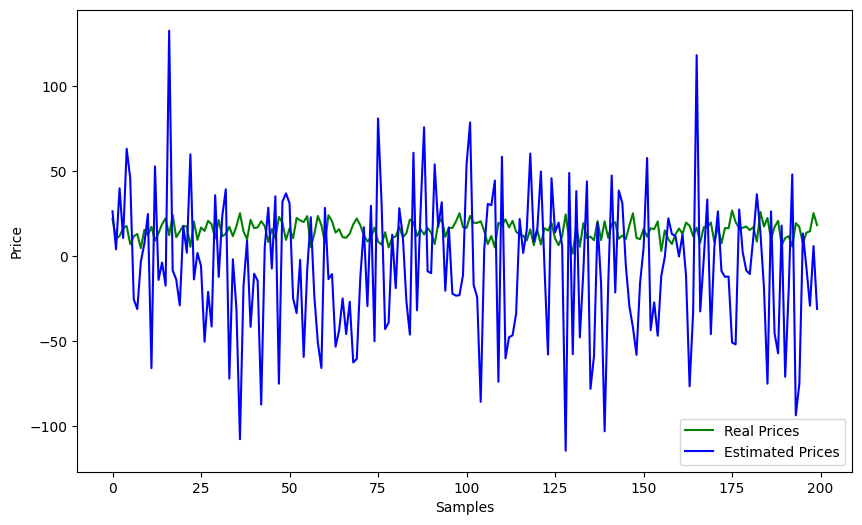

In [29]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)
    
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()